In [437]:
import pandas as pd
import json, requests, folium
from folium.plugins import TimeSliderChoropleth
import branca
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [439]:
df = pd.read_csv('GDP_dataset.csv', delimiter=';') # se e vo $
df.drop(columns=["Indicator Name", "Unnamed: 69","2024", "Indicator Code"], inplace=True)
df.head(5)

Country Name Country Code        1960        1961  \
0                        Aruba          ABW         NaN         NaN   
1  Africa Eastern and Southern          AFE  186.132432  186.947182   
2                  Afghanistan          AFG         NaN         NaN   
3   Africa Western and Central          AFW  121.938353  127.452629   
4                       Angola          AGO         NaN         NaN   

         1962        1963        1964        1965        1966        1967  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1  197.408105  225.447007  209.005786  226.883067  240.962194  243.824367   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3  133.825452  139.006714  148.547736  155.563837  162.109362  144.942612   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   ...          2014          2015          2016          2017          2018  \
0  ...  26129.839062  27458.225331  27441.529662  28440.051964  30082.127645   
1  ...   1656.107642   1479.564123   1329.777824   1520.171298   1538.924188   
2  ...    625.054942    565.569730    522.082216    525.469771    491.337221   
3  ...   2204.995700   1845.767804   1616.843198   1560.162999   1703.896392   
4  ...   5005.999741   3213.902611   1807.952941   2437.259712   2538.591391   

           2019          2020          2021          2022          2023  
0  31096.205074  22855.932320  27200.061079  30559.533535  33984.790620  
1   1493.780445   1344.080962   1522.590088   1628.024526   1659.515290  
2    496.602504    510.787063    356.496214    357.261153    415.707417  
3   1783.654365   1664.249176   1747.840549   1777.235012   1568.724310  
4   2189.855714   1449.922867   1925.874661   2929.694455   2308.159767  

[5 rows x 66 columns]

# Choropleth map

In [442]:
long = (
    df.melt(id_vars=["Country Name", "Country Code"],
            var_name="Year",
            value_name="Value")
      .dropna(subset=["Value"])         
      .astype({"Year": int})            
)
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
world_geo = requests.get(geojson_url).json()
pd.DataFrame(world_geo["features"])

# min_v, max_v = long["Value"].min(), long["Value"].max()
min_v, max_v = long["Value"].min(), 128678.189943 # ova e vtorata vrednost deka prvata vrednost e ogromna za vo monaco i losa e mapata
colormap      = branca.colormap.linear.YlGnBu_09.scale(min_v, max_v)



styledict = {}
for code, frame in long.groupby("Country Code"): 
    # ova groupby - za sekoja kratenka na drzava gi stava podatocite za [Country Name, Country Code(kratenka), Year, Value]
    styledict[code] = {} # code e kratenkata na sekoja drzava
    for _, row in frame.iterrows():

        year        = int(row['Year'])

        epoch_ms    = int(datetime.datetime(year, 1, 1).timestamp())
        time_key    = str(epoch_ms)    
        styledict[code][time_key] = {
            "color":      colormap(row["Value"]),                       # border samo
            "opacity":     1,
            "weight":       1,

        }


gdp_map = folium.Map(location=[20, 0], zoom_start=2)

slider_layer = TimeSliderChoropleth(
    data=json.dumps(world_geo),   
    styledict=styledict           
).add_to(gdp_map)



colormap.caption = "GDP per capita (current US$)"
colormap.add_to(gdp_map)
gdp_map

In [444]:
df.sort_values(by="2023", ascending=False).head(30)

Country Name Country Code         1960         1961  \
149                     Monaco          MCO          NaN          NaN   
144                 Luxembourg          LUX  2261.177418  2241.360032   
27                     Bermuda          BMU  1715.314632  1773.995316   
111                    Ireland          IRL   706.551022   761.851360   
37                 Switzerland          CHE  1954.311321  2155.449969   
52              Cayman Islands          CYM          NaN          NaN   
177                     Norway          NOR  1451.285078  1570.638044   
208                  Singapore          SGP   428.056183   449.148137   
251              United States          USA  2999.864872  3059.160821   
200                      Qatar          QAT          NaN          NaN   
170              North America          NAC  2933.326121  2985.345095   
114                    Iceland          ISL  1436.258854  1439.449724   
38             Channel Islands          CHI          NaN          NaN   
78               Faroe Islands          FRO          NaN          NaN   
58                     Denmark          DNK  1389.021394  1530.537790   
146           Macao SAR, China          MAC          NaN          NaN   
13                   Australia          AUS  1810.706430  1877.707064   
176                Netherlands          NLD  1156.385977  1254.420283   
14                     Austria          AUT   939.914815  1036.728204   
223                     Sweden          SWE  2128.388844  2304.497886   
17                     Belgium          BEL  1290.286072  1367.788852   
55                     Germany          DEU  1162.122668  1315.907878   
198  Post-demographic dividend          PST  1370.470380  1442.471329   
35                      Canada          CAN  2264.948497  2246.083566   
75                     Finland          FIN  1191.855089  1341.499006   
115                     Israel          ISR  1449.761409  1694.109029   
96        Hong Kong SAR, China          HKG   424.056554   436.754412   
81              United Kingdom          GBR  1397.594803  1472.385714   
8         United Arab Emirates          ARE          NaN          NaN   
95                 High income          HIC  1204.643518  1269.177270   

            1962         1963         1964         1965         1966  \
149          NaN          NaN          NaN          NaN          NaN   
144  2331.556858  2461.901124  2779.184397  2803.853046  2925.222047   
27   1824.182283  1821.790913  1986.640810  2064.853248  2369.472947   
111   821.344113   878.156576   994.607332  1055.036247  1107.318230   
37   2330.477365  2508.474307  2734.930090  2865.244848  3044.845604   
52           NaN          NaN          NaN          NaN          NaN   
177  1678.267257  1787.318534  1950.693242  2178.775081  2332.510599   
208   472.082740   511.202235   485.530686   516.531929   566.803974   
251  3236.013112  3366.369790  3565.314430  3818.288251  4136.308296   
200          NaN          NaN          NaN          NaN          NaN   
170  3148.480345  3276.240573  3473.156587  3722.179138  4035.881854   
114  1585.721438  1859.248362  2332.473658  2764.473565  3264.047427   
38           NaN          NaN          NaN          NaN          NaN   
78           NaN          NaN          NaN  1594.478841  1749.161535   
58   1711.218138  1807.252792  2049.397243  2284.228505  2487.136271   
146          NaN          NaN          NaN          NaN          NaN   
13   1854.746154  1967.211274  2131.380300  2281.110305  2343.915919   
176  1342.368272  1436.887261  1668.330861  1848.098015  1986.270244   
14   1093.014191  1172.557446  1275.457153  1381.077258  1494.049114   
223  2485.494147  2675.103624  2961.062832  3227.916782  3477.937313   
17   1457.265170  1555.022932  1724.018942  1859.509987  1983.131198   
55   1430.520955  1502.154529  1637.455228  1774.198690  1870.805403   
198  1541.971884  1639.928645  1771.287619  1905.186935  2063.416880   
35   2274.428471  2380.317

In [446]:
df.shape

(266, 66)

# Vizuelizacii

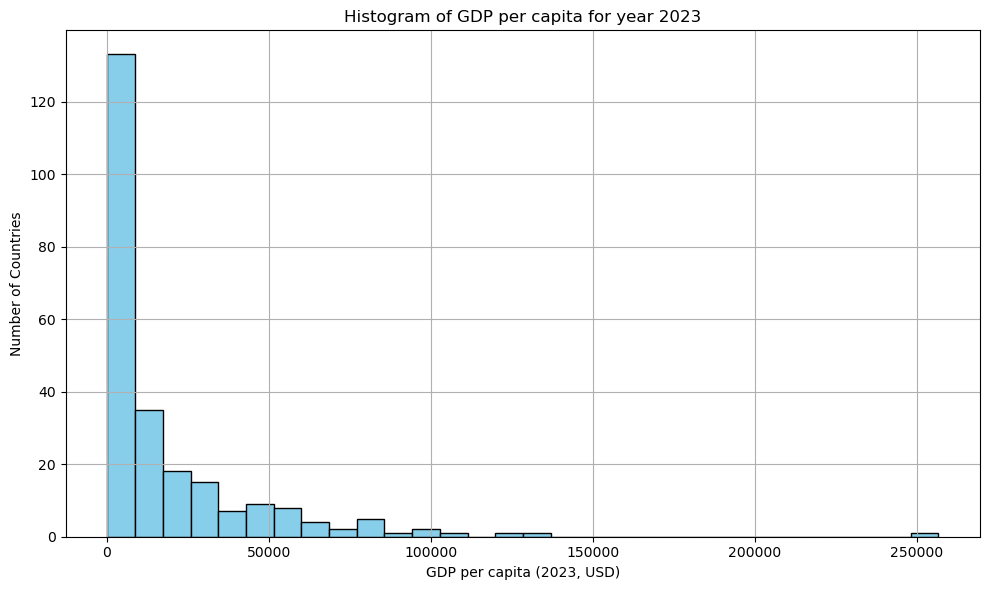

In [449]:
gdp_2023 = pd.to_numeric(df["2023"], errors='coerce').dropna().values
plt.figure(figsize=(10,6))
plt.hist(gdp_2023, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('GDP per capita (2023, USD)')
plt.ylabel('Number of Countries')
plt.title('Histogram of GDP per capita for year 2023')
plt.grid(True)
plt.tight_layout()
plt.show()

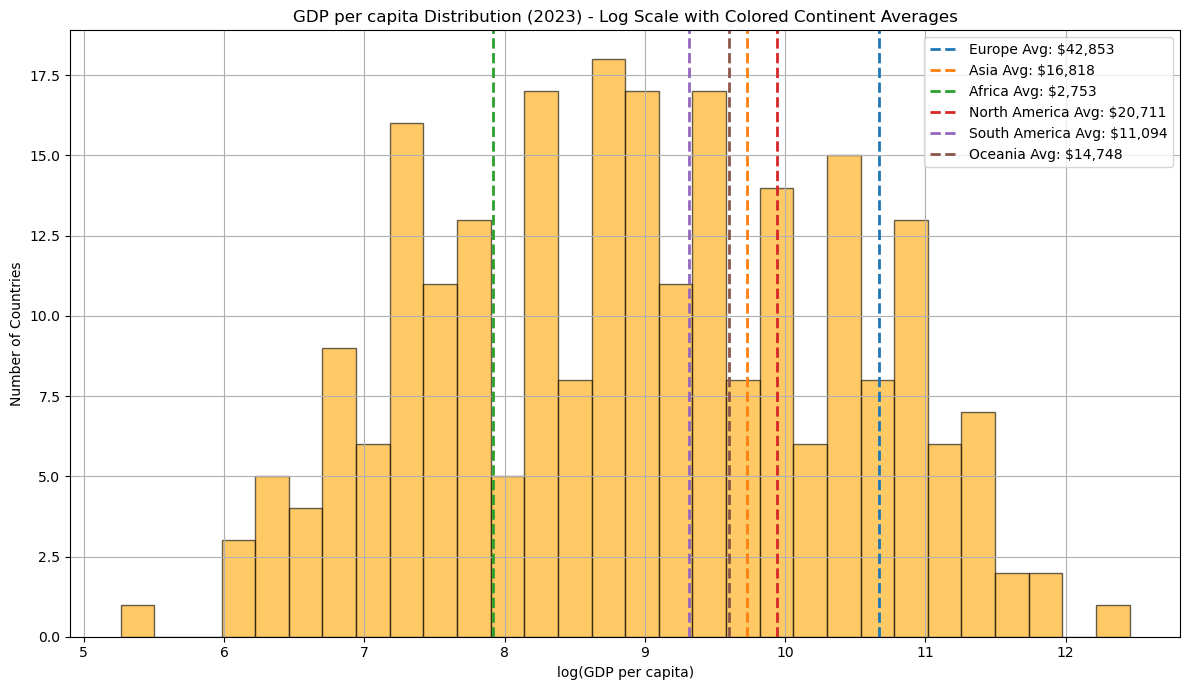

In [451]:
colors_ext = plt.colormaps['tab10']

continent_map = {
    "Europe": [
        'Ukraine', 'Ireland', 'Liechtenstein', 'Russian Federation', 'Malta', 'Iceland', 'France', 'Croatia',
        'Denmark', 'Norway', 'Lithuania', 'Switzerland', 'Greece', 'Italy', 'North Macedonia', 'Moldova',
        'Spain', 'Bosnia and Herzegovina', 'Czechia', 'Germany', 'Belgium', 'Central Europe and the Baltics',
        'Hungary', 'Finland', 'Romania', 'Kosovo', 'San Marino', 'Sweden', 'Slovak Republic', 'Netherlands',
        'Serbia', 'Belarus', 'Slovenia', 'Luxembourg', 'Bulgaria', 'Estonia', 'Portugal', 'Albania',
        'Montenegro', 'Austria', 'Latvia', 'Monaco', 'Poland', 'Andorra'
    ],
    "Asia": [
        'Nepal', 'Philippines', 'Mongolia', 'Iran, Islamic Rep.', 'Bhutan', 'Jordan', 'Afghanistan',
         'Uzbekistan', 'China', 'Japan', 'Maldives', 'Tajikistan', 'Israel',
        'Syrian Arab Republic', 'Singapore', 'Azerbaijan', "Korea, Dem. People's Rep.", 'Iraq',
        'Qatar', 'Thailand', 'Kuwait', 'Turkmenistan',
        'India', 'Bangladesh', 'Indonesia', 'Macao SAR, China', 'Kyrgyz Republic', 'Yemen, Rep.',
        'Saudi Arabia', 'Georgia', 'Kazakhstan', 'Oman',
        'Europe & Central Asia', 'Sri Lanka', 'Lebanon', 'Armenia', 'Malaysia', 'Cambodia', 'Myanmar',
        'East Asia & Pacific (excluding high income)', 'Korea, Rep.', 'Pakistan',
        'Hong Kong SAR, China'
    ],
    "Africa": [
        'Mozambique', 'Lesotho', 'Sao Tome and Principe', 'Africa Eastern and Southern', 'Mauritius', 'Benin',
        'Djibouti', 'South Sudan', 'Ethiopia', 'Sierra Leone',
        'Ghana', 'Burundi', 'Sudan', 'Cameroon', 'Zambia', 'Angola', 'Guinea', 'Tanzania', 'South Africa',
        'Uganda', 'Somalia', 'Senegal', 'Seychelles',
        'Tunisia', 'Libya', 'Equatorial Guinea', 'Gabon', 'Africa Western and Central', 'Nigeria', 'Mali',
        'Comoros', 'Togo', 'Gambia, The', 'Kenya', 'Algeria', 'Congo, Dem. Rep.', 'Central African Republic',
        'Eritrea', 'Zimbabwe', 'Burkina Faso', 'Botswana', 'Liberia',
        'Morocco', 'Chad', 'Rwanda', 'Egypt, Arab Rep.', 'Niger',
        'Guinea-Bissau', 'Congo, Rep.', 'Namibia', 'Papua New Guinea', 'Malawi'
    ],
    "North America": [
        'Dominican Republic', 'Mexico', 'Grenada', 'St. Lucia', 'El Salvador', 'North America', 'Belize',
        'United States', 'Haiti', 'Dominica', 'Antigua and Barbuda', 'Guatemala', 'St. Vincent and the Grenadines',
        'Bahamas, The', 'Barbados', 'Cuba', 'Canada', 'Honduras', 'Trinidad and Tobago', 'Nicaragua',
        'Jamaica', 'Panama', 'Costa Rica'
    ],
    "South America": [
        'Ecuador', 'Paraguay', 'Peru', 'Bolivia', 'Venezuela, RB', 'Guyana', 'Uruguay',
        'Colombia', 'Argentina', 'Suriname', 'Chile', 'Brazil'
    ],
    "Oceania": [
        'New Zealand', 'Tuvalu', 'Tonga', 'Micronesia, Fed. Sts.', 'Vanuatu', 'Fiji', 'Australia',
        'Solomon Islands', 'Marshall Islands', 'American Samoa', 'Nauru', 'Samoa', 'Kiribati', 'Palau'
    ]
}



continent_avgs_extended = {}
for continent, countries in continent_map.items():
    mask = df["Country Name"].apply(lambda x: any(country in x for country in countries))
    gdp_values = pd.to_numeric(df.loc[mask, "2023"], errors='coerce').dropna()
    if not gdp_values.empty:
        continent_avgs_extended[continent] = gdp_values.mean()


plt.figure(figsize=(12,7))
plt.hist(np.log(gdp_2023), bins=30, color='orange', edgecolor='black', alpha=0.6)
plt.xlabel('log(GDP per capita)')
plt.ylabel('Number of Countries')
plt.title('GDP per capita Distribution (2023) - Log Scale with Colored Continent Averages')
plt.grid(True)

for idx, (continent, avg_gdp) in enumerate(continent_avgs_extended.items()):
    plt.axvline(np.log(avg_gdp), linestyle='--', linewidth=2, color=colors_ext(idx), label=f'{continent} Avg: ${avg_gdp:,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

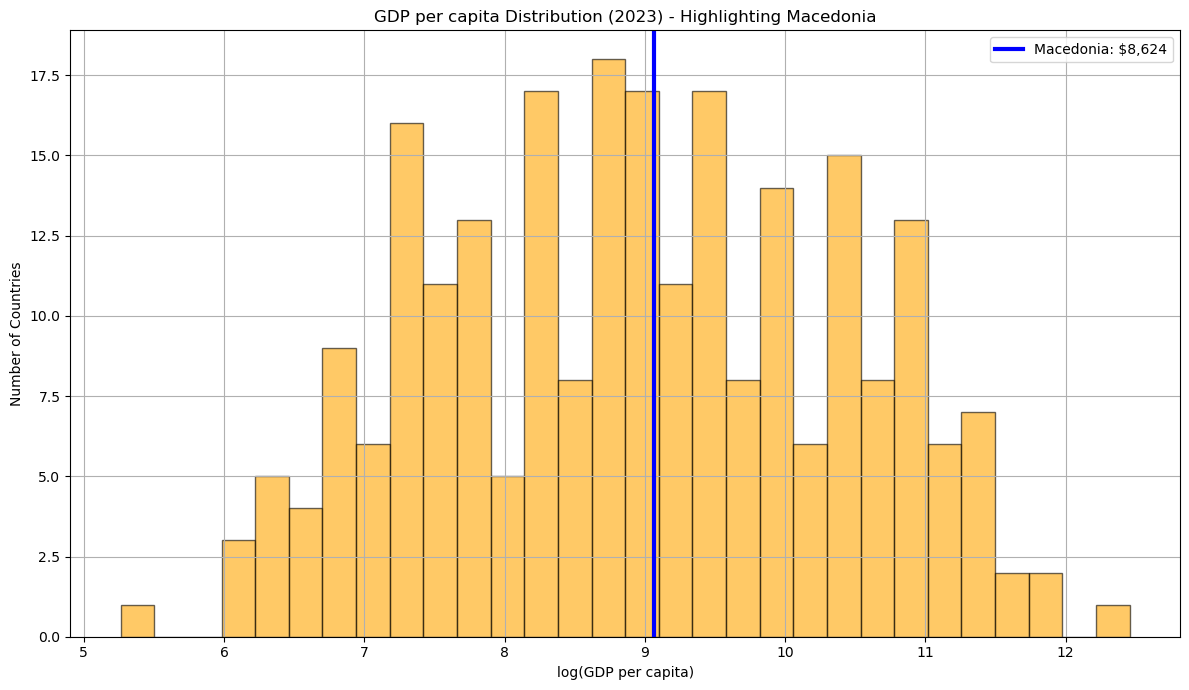

In [454]:

north_macedonia_gdp = df.loc[df["Country Name"].str.contains("North Macedonia"), "2023"]
north_macedonia_gdp = pd.to_numeric(north_macedonia_gdp, errors='coerce').dropna()

plt.figure(figsize=(12,7))
plt.hist(np.log(gdp_2023), bins=30, color='orange', edgecolor='black', alpha=0.6)
plt.xlabel('log(GDP per capita)')
plt.ylabel('Number of Countries')
plt.title('GDP per capita Distribution (2023) - Highlighting Macedonia')
plt.grid(True)


if not north_macedonia_gdp.empty:
    plt.axvline(np.log(north_macedonia_gdp.iloc[0]), linestyle='-', linewidth=3, color='blue',
                label=f'Macedonia: ${north_macedonia_gdp.iloc[0]:,.0f}')

plt.legend()
plt.tight_layout()
plt.show()


# Lorentzova kriva za 2023, vtoriot grafik e za povekje godini

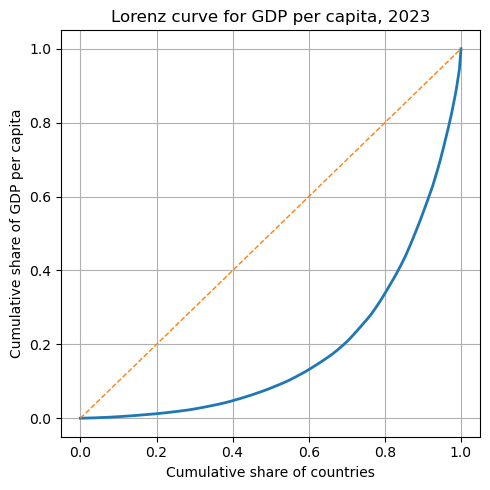

Gini coefficient for 2023 GDP per capita: 0.634


In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


gdp_2023 = (df[["Country Name", "Country Code", "2023"]].dropna(subset=["2023"]).copy())

values = gdp_2023["2023"].values
values.sort()
n = len(values)


cum_pop   = np.linspace(0, 1, n)    
# kumulativna populacija e kolku od dosegasnite drzavi(sortirani od najmal gdp do najgolem) se zemaat vo predvid. Toa e x oskata.
cum_income = np.cumsum(values) / values.sum()
# np.cumsum - ako imame niza=[1,3,8] togas ovaa funkcija ke vrati niza [1,4,12], kumulativna suma. I bas sekoja od ovie ke gi podelime so
# celosnata suma(suma na site GDPs), ke dobieme dosegasnite drzavi kolku doprinesuvaat vo celosnoto gdp. I toa si e y oskata.


# 4. plot
plt.figure(figsize=(5, 5))
plt.plot(cum_pop, cum_income, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)     
plt.title("Lorenz curve for GDP per capita, 2023")
plt.xlabel("Cumulative share of countries")
plt.ylabel("Cumulative share of GDP per capita")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gini koeficient
lorenz_area = np.trapz(cum_income, cum_pop) # plostina pod lorenz krivata
gini = 1 - 2 * lorenz_area
print(f"Gini coefficient for 2023 GDP per capita: {gini:.3f}")


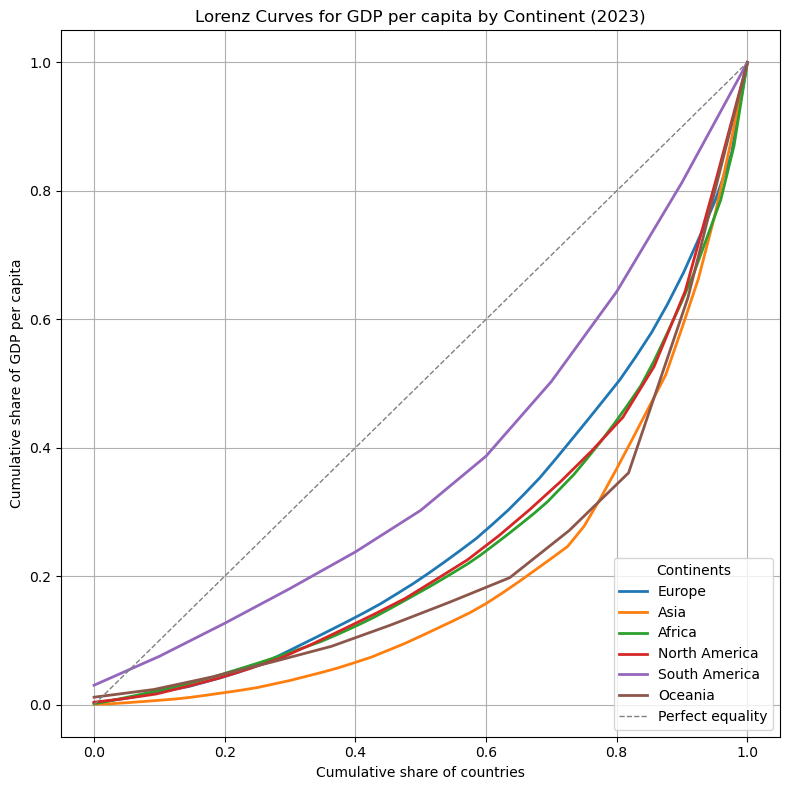

Europe Gini: 0.451
Asia Gini: 0.594
Africa Gini: 0.495
North America Gini: 0.485
South America Gini: 0.243
Oceania Gini: 0.550


In [461]:
plt.figure(figsize=(8,8))

colors = plt.colormaps['tab10']
labels = []

for idx, (continent, countries) in enumerate(continent_map.items()):
    
    mask = df["Country Name"].apply(lambda x: any(country in x for country in countries))
    values = df.loc[mask, "2023"].dropna().values
    if len(values) == 0:
        continue

    values.sort()
    n = len(values)
    cum_pop = np.linspace(0, 1, n)
    cum_income = np.cumsum(values) / values.sum()
    
    plt.plot(cum_pop, cum_income, label=f"{continent}", color=colors(idx), linewidth=2)


    lorenz_area = np.trapz(cum_income, cum_pop)
    gini = 1 - 2 * lorenz_area
    labels.append(f"{continent} Gini: {gini:.3f}")


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1, label="Perfect equality")

plt.title("Lorenz Curves for GDP per capita by Continent (2023)")
plt.xlabel("Cumulative share of countries")
plt.ylabel("Cumulative share of GDP per capita")
plt.legend(title="Continents", loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n".join(labels))

# Gini koeficient niz godinite

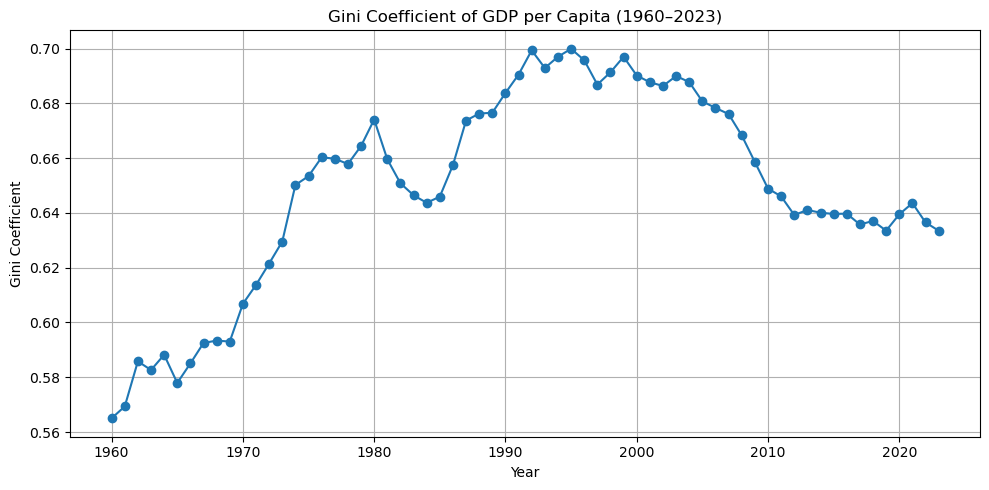

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gini_values = []

for year in range(1960, 2024):
    col = str(year)

    data = df[["Country Code", col]].dropna(subset=[col]).copy()


    values = data[col].astype(float).values

    
    values.sort()
    n = len(values)
    cum_pop = np.linspace(0, 1, n)
    cum_income = np.cumsum(values) / values.sum()

    lorenz_area = np.trapz(cum_income, cum_pop)
    gini = 1 - 2 * lorenz_area

    gini_values.append((year, gini))


gini_df = pd.DataFrame(gini_values, columns=["Year", "Gini"])

plt.figure(figsize=(10, 5))
plt.plot(gini_df["Year"], gini_df["Gini"], marker='o')
plt.title("Gini Coefficient of GDP per Capita (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()


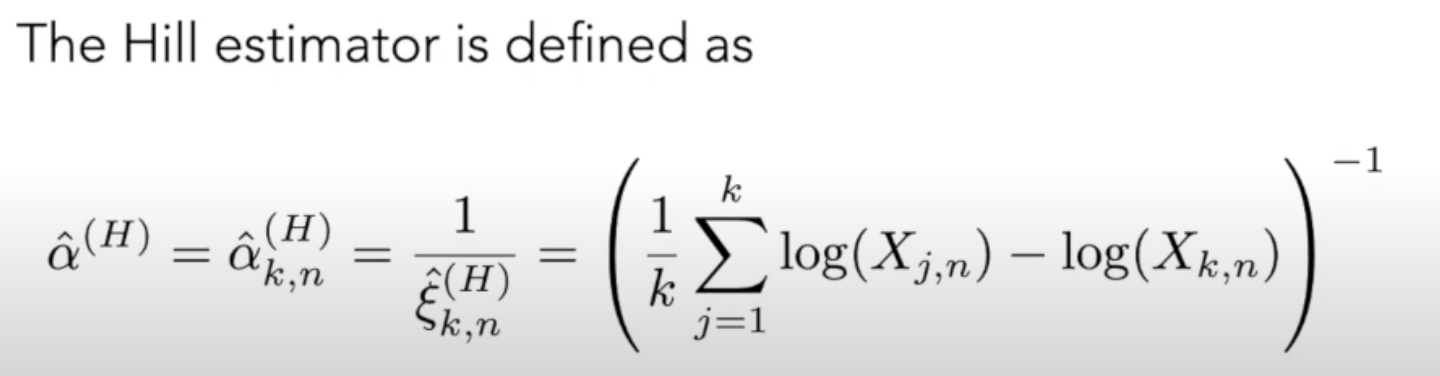

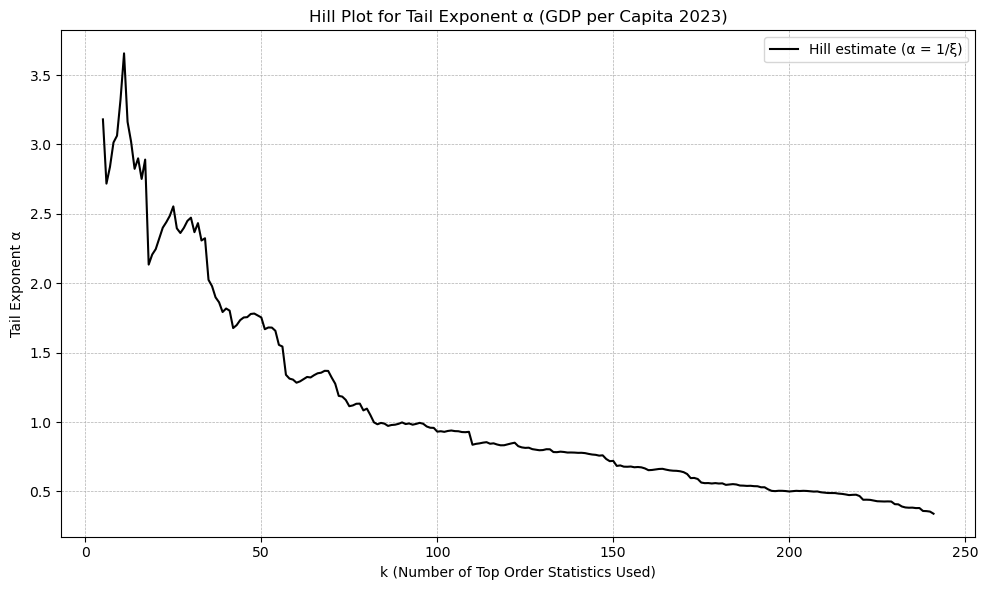

In [470]:
gdp_2023 = df["2023"].dropna().values
gdp_sorted = np.sort(gdp_2023)[::-1]  # opagjacki redosled

k_vals = np.arange(5, len(gdp_sorted) - 1) # k e kolku top primeroci ke vklucime vo estimacijata na a
hill_estimates = []

for k in k_vals:
    top_k = gdp_sorted[:k] # najgolemite k GDP vrednosti
    x_k1 = gdp_sorted[k]
    hill_xi = np.mean(np.log(top_k) - np.log(x_k1))  # ξ estimate
    alpha = 1 / hill_xi                              # α = 1/ξ
    hill_estimates.append(alpha)


plt.figure(figsize=(10, 6))
plt.plot(k_vals, hill_estimates, color='black', label='Hill estimate (α = 1/ξ)')
plt.title("Hill Plot for Tail Exponent α (GDP per Capita 2023)")
plt.xlabel("k (Number of Top Order Statistics Used)")
plt.ylabel("Tail Exponent α")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

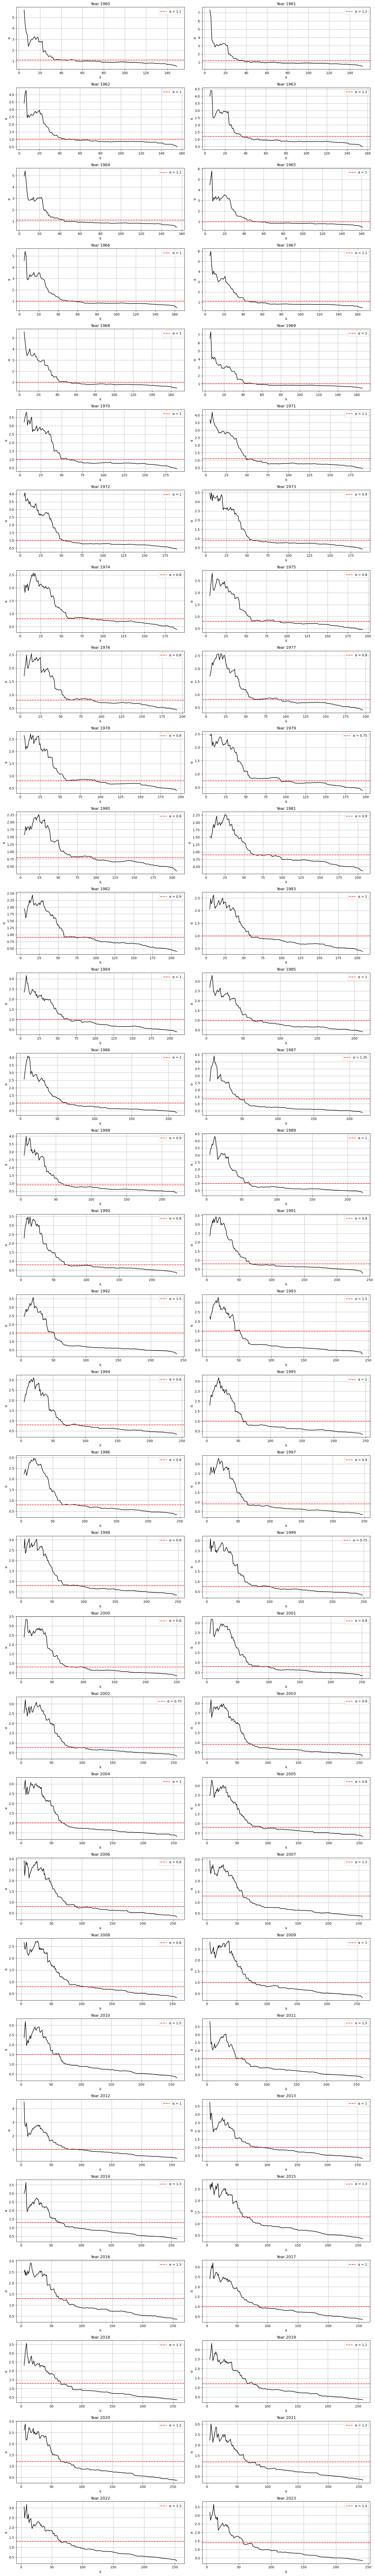

In [471]:
# pomala vrednost za alpha -> teska opaska
# pogolema vrednost za alpha -> potenka opaska

# Vo odnos na podatocite poteska opaska znaci deka ima mnogu neednakvost. Ima mnogu drzavi koi se so pogolemo GDP vo odnos na modata
# Lesna opaska znaci deka pomalce neednakvost ima. Malce podatoci se so pogolema vrednost za GDP vo odnos na modata

# Тука од плотовите визуелно го одредувам алфа параметарот. Не знам дали вака се одредува. 
# Со црвена хоризонтална линија на плотот ја означувам вредноста за алфа. 
# Доколку постои некој подобар автоматски метод за определување на параметарот можеби е подобро така да се направи.
alpha_estimates_per_year = { 
	1960: 1.1,
	1961: 1.2,
	1962: 1,
	1963: 1.2,
	1964: 1.1,
	1965: 1,
	1966: 1,
	1967: 1.1,
	1968: 1,
	1969: 1,
	1970: 1,
	1971: 1.1,
	1972: 1,
	1973: 0.9,
	1974: 0.8,
	1975: 0.8,
	1976: 0.8,
	1977: 0.8,
	1978: 0.8,
	1979: 0.75,
	1980: 0.8,
	1981: 0.9,
	1982: 0.9,
	1983: 1,
	1984: 1,
	1985: 1,
	1986: 1,
	1987: 1.35 ,
	1988: 0.9,
	1989: 1,
	1990: 0.8,
	1991: 0.8,
	1992: 1.5,
	1993: 1.5,
	1994: 0.8,
	1995: 1,
	1996: 0.8,
	1997: 0.9 ,
	1998: 0.8,
	1999: 0.75,
	2000: 0.80,
	2001: 0.80,
	2002: 0.75, 
	2003: 0.9,
	2004: 1,
	2005: 0.8,
	2006: 0.8,
	2007: 1.3,
	2008: 0.8,
	2009: 1,
	2010: 1.5,
	2011: 1.5,
	2012: 1,
	2013: 1,
	2014: 1.3,
	2015: 1.3,
	2016: 1.3,
	2017: 1,
	2018: 1.3,
	2019: 1.2,
	2020: 1.2, 
	2021: 1.2, 
	2022: 1.3, 
	2023: 1.4, 
}



fig, axs = plt.subplots(32, 2, figsize=(16, 110))
axs = axs.flatten()

years = list(alpha_estimates_per_year.keys())

for idx, year in enumerate(years):
    year_str = str(year)
    if year_str in df.columns:
        gdp_year = df[year_str].dropna().astype(float).values
        gdp_sorted = np.sort(gdp_year)[::-1]
        k_vals = range(5, len(gdp_sorted)-1)
        estimates = []

        for k in k_vals:
            top_k = gdp_sorted[:k]
            x_k1 = gdp_sorted[k]
            hill_xi = np.mean(np.log(top_k) - np.log(x_k1))
            alpha = 1 / hill_xi
            estimates.append(alpha)

        axs[idx].plot(k_vals, estimates, color='black')
        axs[idx].axhline(y=alpha_estimates_per_year[year], color='red', linestyle='--', label=f"α = {alpha_estimates_per_year[year]}")
        axs[idx].set_title(f"Year {year}")
        axs[idx].set_xlabel("k")
        axs[idx].set_ylabel("α")
        axs[idx].grid(True)
        axs[idx].legend()


plt.tight_layout()
plt.show()

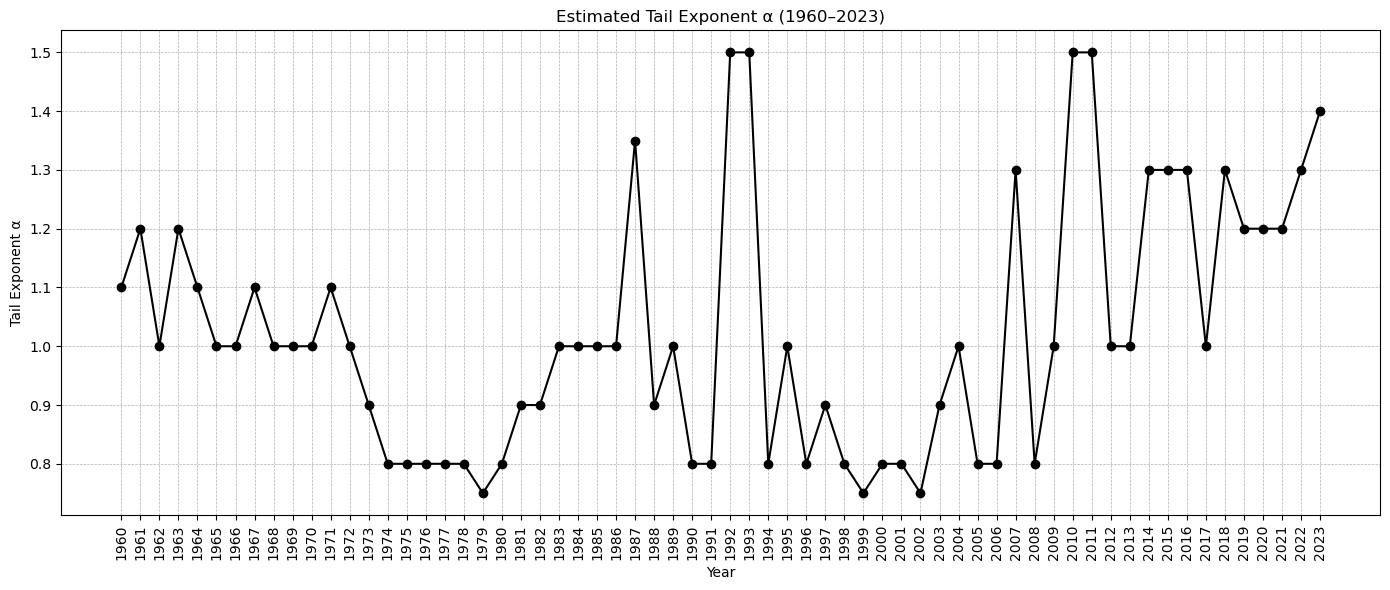

In [473]:
years = list(alpha_estimates_per_year.keys())
alpha_values = list(alpha_estimates_per_year.values())


plt.figure(figsize=(14, 6))
plt.plot(years, alpha_values, marker='o', color='black', linestyle='-')
plt.xticks(years, rotation=90)
plt.title("Estimated Tail Exponent α (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Tail Exponent α")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Chow test

In [476]:
def line_plot_for_GDP_for_country(country, detected_breakpoints=None):
    
    usa_row = df[df["Country Code"] == country]
    year_columns = [col for col in df.columns if col.isdigit()]
    usa_gdp = usa_row[year_columns].astype(float).squeeze()
    years_int = [int(year) for year in year_columns]

    plt.figure(figsize=(12, 6))
    plt.plot(year_columns, usa_gdp, marker='o', linestyle='-', color='blue', label=f"{country} GDP per Capita")
    
    
    if detected_breakpoints:
        # filter the years that exist in the data
        breakpoint_years = [str(year) for year in detected_breakpoints if str(year) in year_columns]
        breakpoint_gdps = [usa_gdp[year] for year in breakpoint_years]
        plt.scatter(breakpoint_years, breakpoint_gdps, color='red', zorder=5, label='Detected Breakpoints')

    plt.title(f"GDP per Capita in the {country} (1960–2023)")
    plt.xlabel("Year")
    plt.ylabel("GDP per Capita (US$)")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


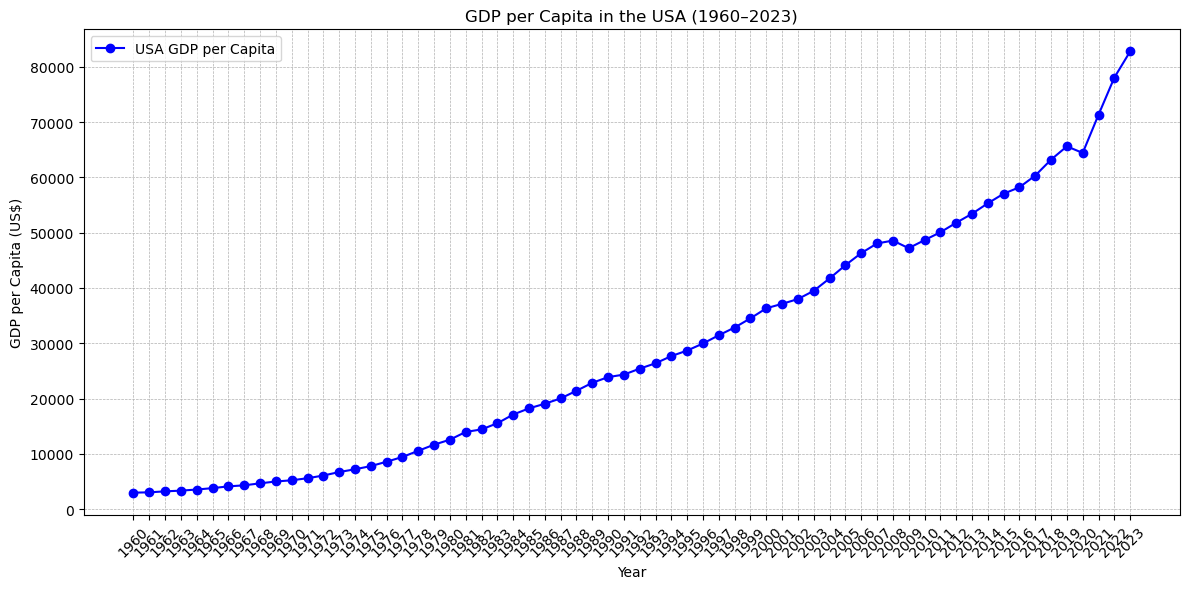

In [477]:
line_plot_for_GDP_for_country("USA")

In [478]:

def chow_test_local(y, X, breakpoint, window=5): 
    # napraviv chow testot namesto da gi deli podatocite na pred nekoja godina(breakpoint) i posle i na celite delovi da pravi
    # linearna regresija, zemav da zima samo 5 vrednosti pred i posle toa i na tie da pravi linearna regresija, bidejki ne dobivav dobri 
    # rezultati koga nemav vakov window
    X1 = []
    X2  = []
    y1 = []
    y2 = []

    if breakpoint + window >= len(X):
        X1 = X[breakpoint - window:breakpoint]
        X2 = X[breakpoint:]
        y1 = y[breakpoint - window:breakpoint]
        y2 = y[breakpoint:]
    else:
        X1 = X[breakpoint - window:breakpoint]
        X2 = X[breakpoint:breakpoint + window]
        y1 = y[breakpoint - window:breakpoint]
        y2 = y[breakpoint:breakpoint + window]

    X_combined = np.vstack((X1, X2))
    y_combined = np.concatenate((y1, y2))

    model_full = sm.OLS(y_combined, sm.add_constant(X_combined)).fit()
    model1 = sm.OLS(y1, sm.add_constant(X1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(X2)).fit()

    # # presmetuva errors
    rss_pooled = np.sum(model_full.resid ** 2)
    rss1 = np.sum(model1.resid ** 2)
    rss2 = np.sum(model2.resid ** 2)

    k = X.shape[1] + 1
    n1, n2 = len(X1), len(X2)

    #racuna F statistika
    numerator = (rss_pooled - (rss1 + rss2)) / k
    denominator = (rss1 + rss2) / (n1 + n2 - 2 * k)
    F = numerator / denominator



    # racuname p value
    from scipy.stats import f as f_dist
    p_val = 1 - f_dist.cdf(F, k, n1 + n2 - 2 * k)

    return p_val


In [479]:
from scipy.stats import f as f_dist
import statsmodels.api as sm
import numpy as np


usa_row = df[df["Country Code"] == "USA"]
year_columns = [col for col in df.columns if col.isdigit()]
years = np.array([int(year) for year in year_columns])
gdp_values = usa_row[year_columns].astype(float).values.flatten()


valid_indices = ~np.isnan(gdp_values)
years = years[valid_indices]
gdp_values = gdp_values[valid_indices]


detected_breaks = []
X = years.reshape(-1, 1)
window = 4

for i in range(window, len(years)):
    p = chow_test_local(gdp_values, X, i,window)
    if p < 0.02:
        detected_breaks.append((years[i], round(p, 4)))


detected_breaks # Spored chow testot vo slednite godini imalo nagol rast ili nagol pad vo vrednostite

[(1964, 0.0123),
 (1971, 0.0036),
 (1972, 0.0016),
 (1975, 0.0064),
 (1976, 0.0014),
 (1977, 0.0049),
 (1991, 0.0142),
 (1995, 0.0135),
 (1996, 0.007),
 (1997, 0.0117),
 (2003, 0.0061),
 (2004, 0.0044),
 (2007, 0.0092),
 (2009, 0.0143),
 (2016, 0.0028),
 (2020, 0.0009)]

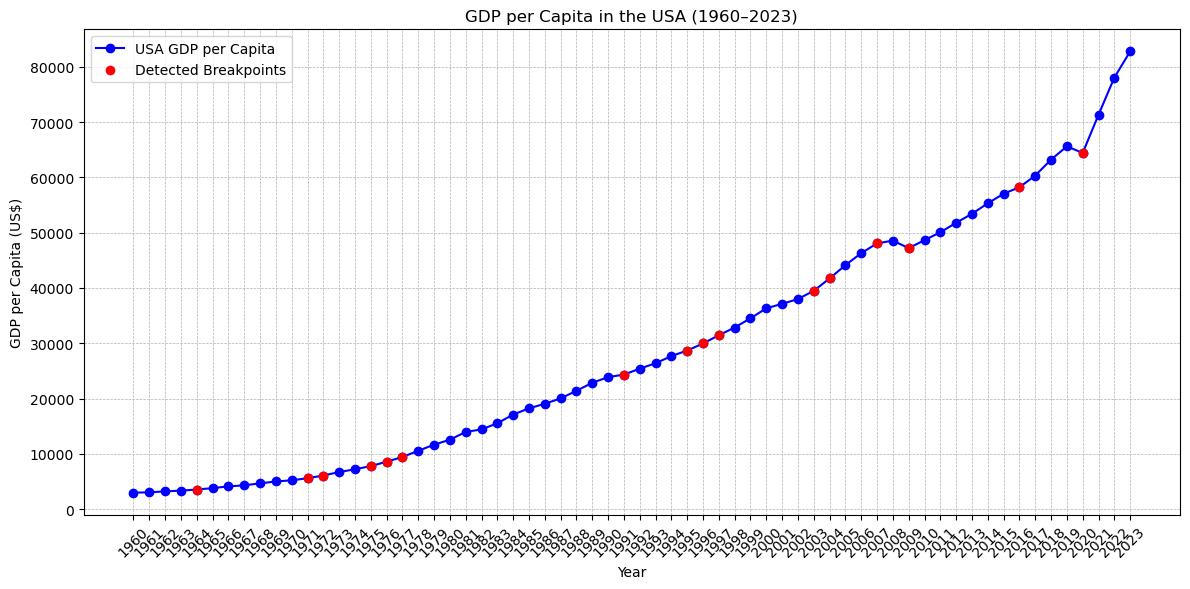

In [480]:
line_plot_for_GDP_for_country("USA",[el[0] for el in detected_breaks])

# Generalized Extreme Value Distribition
Tuka gi delam podatocite vo blokovi i od tie blokovi ja zimam maksimalnata vrednost. Dokolku goleminata na blokot e dovolno golema, 
togas maksimumite ke sledat Extreme Value Distribution. No dobivam mnogu losi rezultati kako sto moze da se vidi na QQ plotot, 
EV distribucijata mnogu loso gi fituva podatocite. 
Sto do negde e ocekuvano, bidejki GDP per capita vrednosta raste niz godinite. 

Zatoa namesto toa ke fituvam Generalized Extreme Value Distribition na growth rates-ot od godina vo godina. I taka bi analiziral nekoi ekstremni promeni na GDP vrednostite. Podole imam podtocka za toa, tamu ke objasnam povekje.


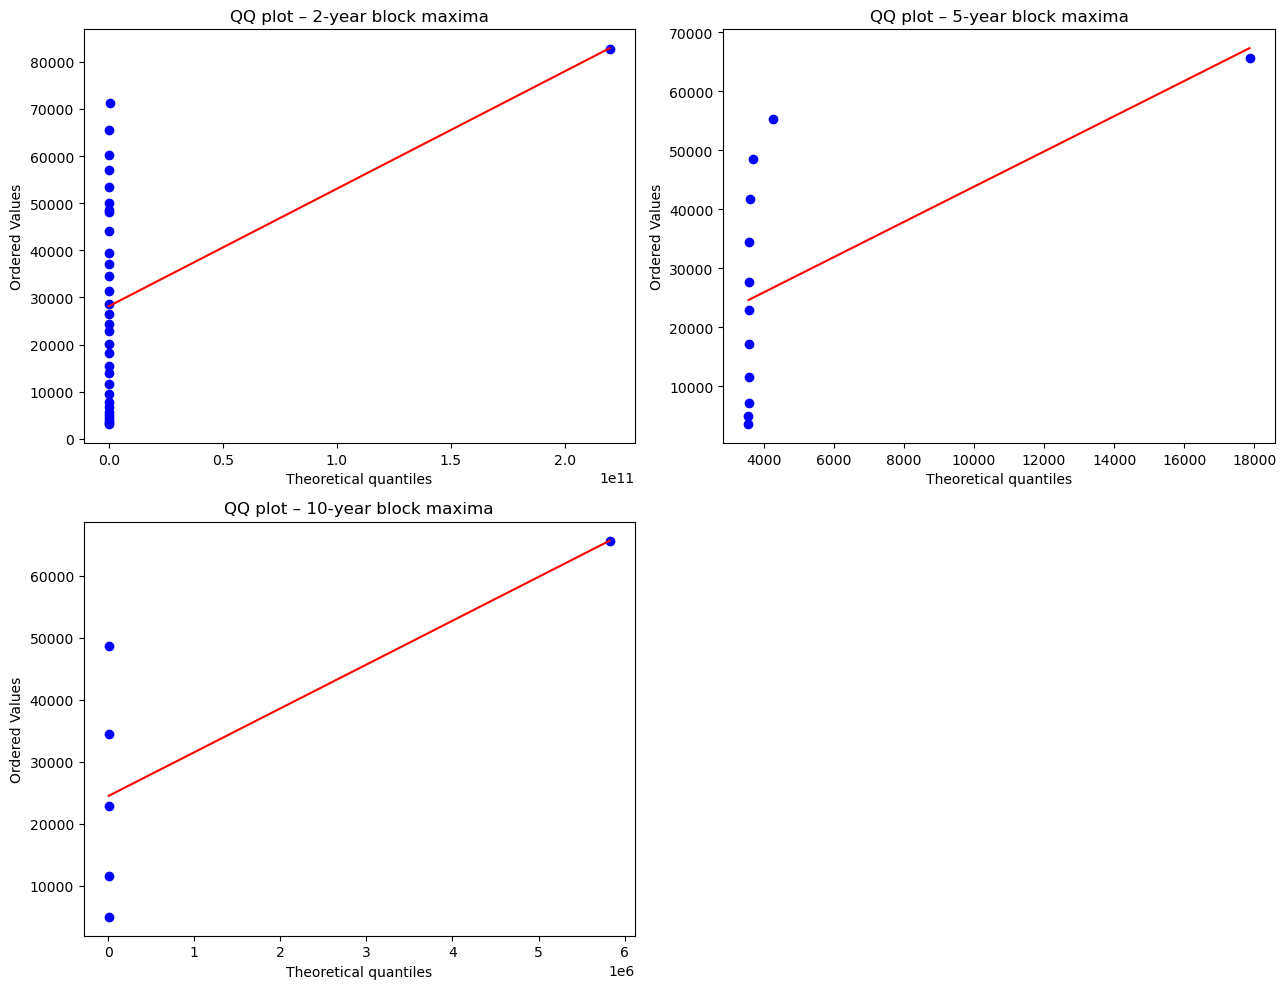

In [483]:
from scipy.stats import genextreme, probplot
usa_row   = df[df["Country Code"] == "USA"]
years_all = np.array([int(c) for c in df.columns if c.isdigit()])
gdp_all   = usa_row[[str(y) for y in years_all]].astype(float).values.flatten()

mask  = ~np.isnan(gdp_all)
gdp   = gdp_all[mask]


def block_maxima(gdp, block): # funkcija za zimanje na maksimum vrednost od daden blok
    n = len(gdp)//block
    maxima   = np.array([gdp[i*block:(i+1)*block].max() for i in range(n)])
    return maxima

max2  = block_maxima(gdp, 2)
max5  = block_maxima(gdp, 5)
max10 = block_maxima(gdp, 10)

# fituvanje GEVD za raz razlicni golemini na blokovi. Probuvam so blok od 2 godini, 5 godini i 10 godini
# c = -xi . Ako c > 0 - Frechet distribucija. Ako c = 0 - Gumbel distribucija. Ako c < 0 - Gumbel distribucija
# loc e location parametarot, toj sto ja shifta distribucijata levo/desno
c2,  mi2,  sigma2  = genextreme.fit(max2)   
c5,  mi5,  sigma5  = genextreme.fit(max5)   
c10, mi10, sigma10 = genextreme.fit(max10)


fig, ax = plt.subplots(2, 2, figsize=(13,10))
ax = ax.ravel()

# QQ plot 2‑godini blok
probplot(max2, dist=genextreme(c2, loc=mi2, scale=sigma2), plot=ax[0])
ax[0].set_title("QQ plot – 2‑year block maxima")

# QQ plot 5‑godini blok
probplot(max5, dist=genextreme(c5, loc=mi5, scale=sigma5), plot=ax[1])
ax[1].set_title("QQ plot – 5‑year block maxima")

# QQ plot 10‑godini blok
probplot(max10, dist=genextreme(c10, loc=mi10, scale=sigma10), plot=ax[2])
ax[2].set_title("QQ plot – 10‑year block maxima")

fig.delaxes(ax[3])
plt.tight_layout()
plt.show()


##  Global average GDP per capita

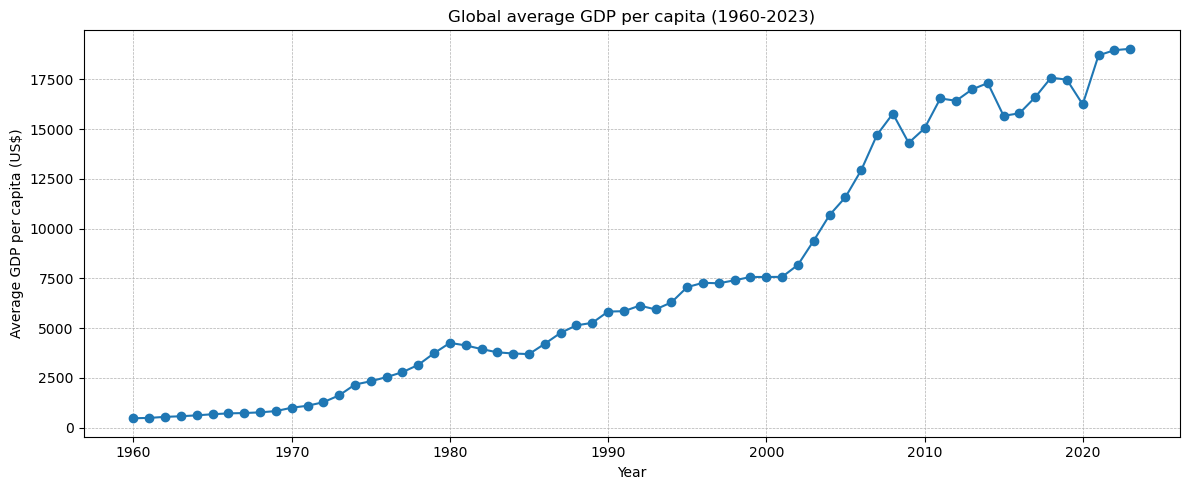

In [485]:
year_cols = [c for c in df.columns if c.isdigit()]
years = np.array([int(c) for c in year_cols])

mean_gdp = df[year_cols].apply(pd.to_numeric, errors='coerce').mean(axis=0).values

plt.figure(figsize=(12,5))
plt.plot(years, mean_gdp, marker='o')
plt.title("Global average GDP per capita (1960‑2023)")
plt.xlabel("Year"); plt.ylabel("Average GDP per capita (US$)")
plt.grid(ls='--', lw=.5)
plt.tight_layout()
plt.show()

## Prikaz na procentot na rast ili pad vo sekoja godina na USA

Year | Growth Rate (%)
-----------------------
1961 |   1.98%
1962 |   5.78%
1963 |   4.03%
1964 |   5.91%
1965 |   7.10%
1966 |   8.33%
1967 |   4.59%
1968 |   8.29%
1969 |   7.16%
1970 |   4.27%
1971 |   7.17%
1972 |   8.64%
1973 |  10.38%
1974 |   7.42%
1975 |   7.97%
1976 |  10.14%
1977 |  10.01%
1978 |  11.77%
1979 |  10.50%
1980 |   7.71%
1981 |  11.14%
1982 |   3.27%
1983 |   7.69%
1984 |  10.15%
1985 |   6.52%
1986 |   4.58%
1987 |   5.07%
1988 |   6.88%
1989 |   6.72%
1990 |   4.51%
1991 |   1.90%
1992 |   4.42%
1993 |   3.81%
1994 |   4.96%
1995 |   3.60%
1996 |   4.45%
1997 |   4.98%
1998 |   4.43%
1999 |   5.06%
2000 |   5.26%
2001 |   2.21%
2002 |   2.33%
2003 |   3.93%
2004 |   5.66%
2005 |   5.75%
2006 |   4.94%
2007 |   3.78%
2008 |   1.08%
2009 |  -2.83%
2010 |   3.08%
2011 |   2.91%
2012 |   3.43%
2013 |   3.14%
2014 |   3.55%
2015 |   3.14%
2016 |   2.04%
2017 |   3.63%
2018 |   4.77%
2019 |   3.80%
2020 |  -1.82%
2021 |  10.72%
2022 |   9.42%
2023 |   6.07%


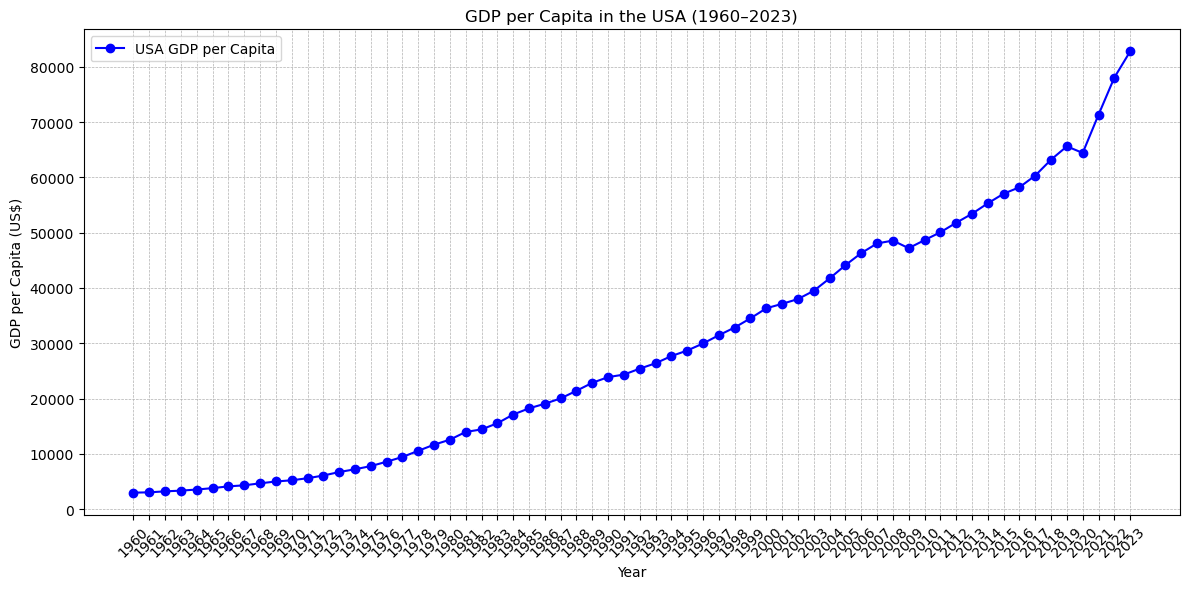

In [487]:
# tuka samo si gi printam growth rates-ot za da vidam dali tocno mi se kalkulirani

years, gdp    = years_all[mask], gdp_all[mask]
log_growth    = np.diff(np.log(gdp))          # koristam continuous growth rate: ln(this year gdp / prev year gdp)
grow_years    = years[1:]                     

percent_growth = (np.exp(log_growth) - 1) * 100 # go pretvaram od continuous growth rate vo obicen procent samo za pecatenjeto
print("Year | Growth Rate (%)")
print("-----------------------")
for y, g in zip(grow_years, percent_growth):
    print(f"{y} | {g:6.2f}%")
line_plot_for_GDP_for_country("USA")

# Generalized Extreme Value Distribution fituvanje na growth rates za GDP per capita vrednostite
Vo gornata kelija kalkuliram growth rate za sekoja godina, i taka dobivam kolku rast ili pad vo vrednosta na GDP per capita imalo vo odredena godina. Od QQ plotovite podole moze da se vidi deka najdobro e da zemam goleminata na blokot da e 2 godini. Tuka pravam blok maxima, od sekoj blok ja zimam maksimalnata vrednost i na nejze fituvam i isto taka pravam i block minima(za analiza na ekstremni padovi).

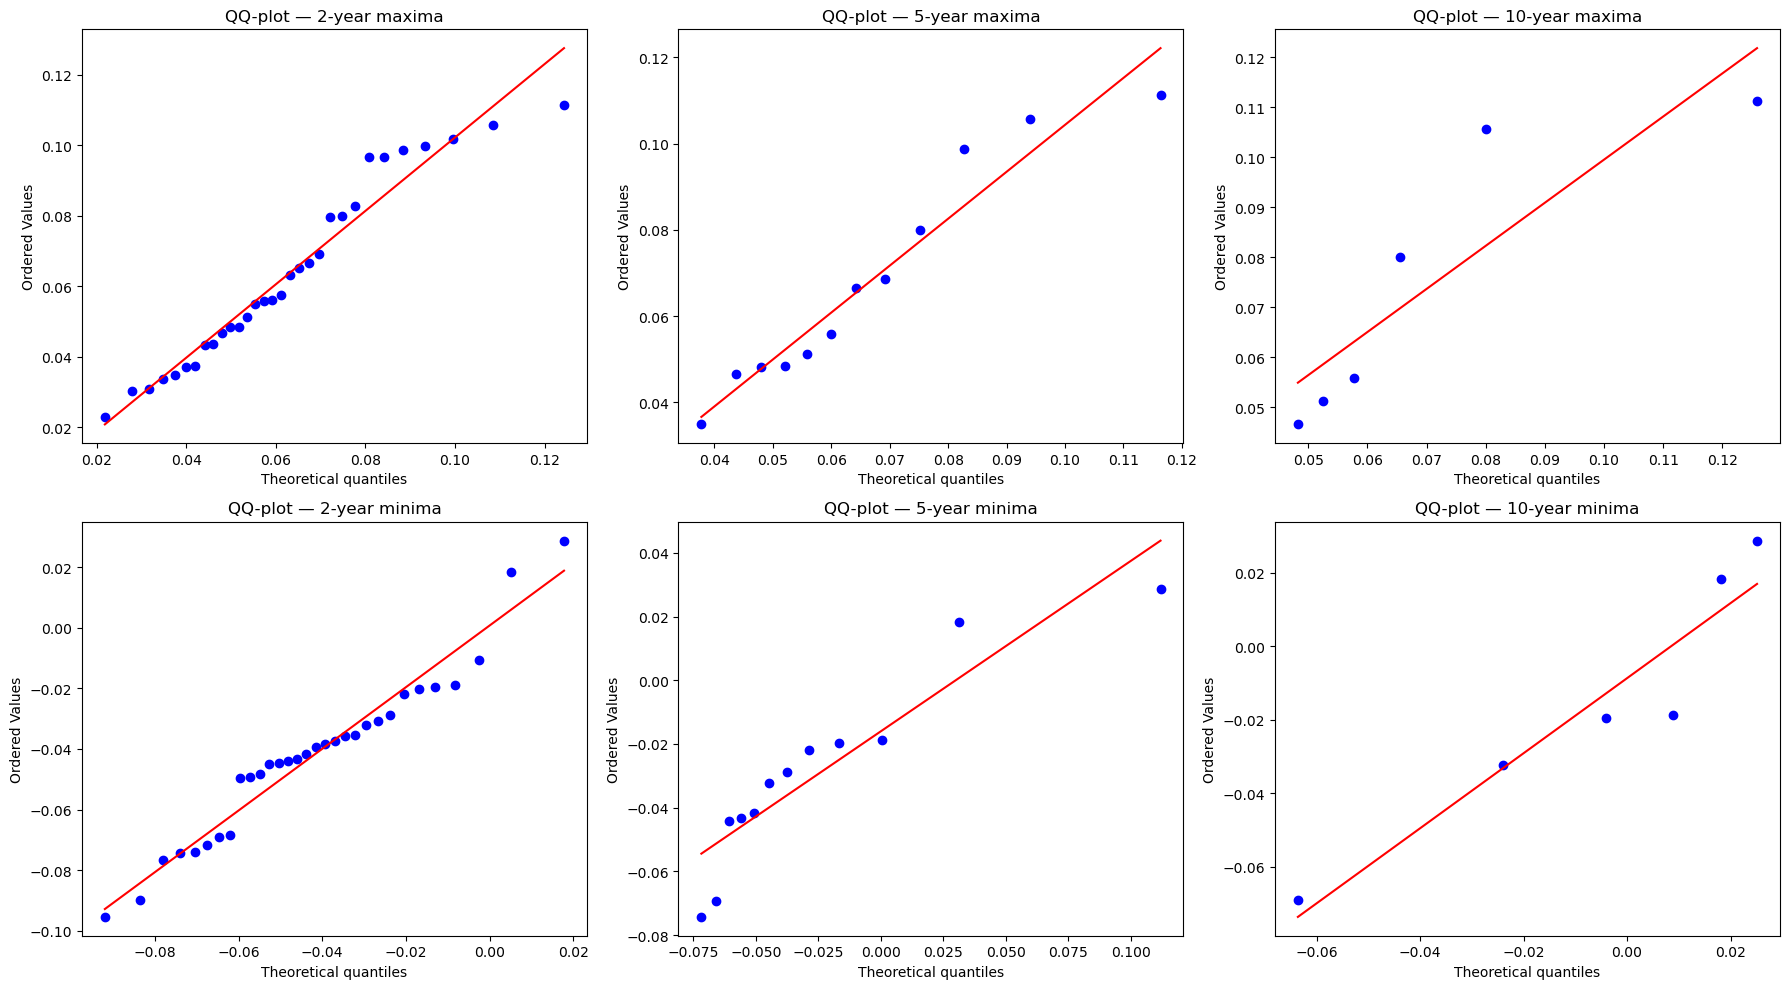

GEV parameters (growth-rate block maxima)
2-year : ξ = -0.057, μ =  0.0514, σ =  0.0213
5-year : ξ =  0.125, μ =  0.0554, σ =  0.0178
10-yr  : ξ =  0.770, μ = 0.0558, σ = 0.0126

GEV parameters (growth-rate block minima)
2-year : ξ = -0.181, μ =  0.0530, σ =  0.0257
5-year : ξ =  0.516, μ =  0.0513, σ =  0.0251
10-yr  : ξ = -1.098, μ = 0.0098, σ = 0.0423


In [489]:
# maxima blocks
max2  = block_maxima(log_growth, 2)
max5  = block_maxima(log_growth, 5)
max10 = block_maxima(log_growth, 10)

# minima blocks (take the negative, then it becomes maxima of negative series)
min2  = block_maxima(-log_growth, 2)
min5  = block_maxima(-log_growth, 5)
min10 = block_maxima(-log_growth, 10)

# fit GEV for maxima
c2 , mi2 , sigma2  = genextreme.fit(max2)
c5 , mi5 , sigma5  = genextreme.fit(max5)
c10, mi10, sigma10 = genextreme.fit(max10)

# fit GEV for minima (will later interpret as minima by taking -loc)
cm2 , mim2 , sigmam2  = genextreme.fit(min2)
cm5 , mim5 , sigmam5  = genextreme.fit(min5)
cm10, mim10, sigmam10 = genextreme.fit(min10)

# plotting QQ plots for maxima
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.ravel()

probplot(max2, dist=genextreme(c2, loc=mi2, scale=sigma2), plot=ax[0])
ax[0].set_title("QQ-plot — 2-year maxima")
probplot(max5, dist=genextreme(c5, loc=mi5, scale=sigma5), plot=ax[1])
ax[1].set_title("QQ-plot — 5-year maxima")
probplot(max10, dist=genextreme(c10, loc=mi10, scale=sigma10), plot=ax[2])
ax[2].set_title("QQ-plot — 10-year maxima")

# plotting QQ plots for minima
probplot(min2, dist=genextreme(cm2, loc=mim2, scale=sigmam2), plot=ax[3])
ax[3].set_title("QQ-plot — 2-year minima")
probplot(min5, dist=genextreme(cm5, loc=mim5, scale=sigmam5), plot=ax[4])
ax[4].set_title("QQ-plot — 5-year minima")
probplot(min10, dist=genextreme(cm10, loc=mim10, scale=sigmam10), plot=ax[5])
ax[5].set_title("QQ-plot — 10-year minima")

plt.tight_layout()
plt.show()

# print parameters
print("GEV parameters (growth-rate block maxima)")
print(f"2-year : ξ = {-c2:6.3f}, μ = {mi2: .4f}, σ = {sigma2: .4f}")
print(f"5-year : ξ = {-c5:6.3f}, μ = {mi5: .4f}, σ = {sigma5: .4f}")
print(f"10-yr  : ξ = {-c10:6.3f}, μ = {mi10:.4f}, σ = {sigma10:.4f}")

print("\nGEV parameters (growth-rate block minima)")
print(f"2-year : ξ = {-cm2:6.3f}, μ = {-mim2: .4f}, σ = {sigmam2: .4f}")
print(f"5-year : ξ = {-cm5:6.3f}, μ = {-mim5: .4f}, σ = {sigmam5: .4f}")
print(f"10-yr  : ξ = {-cm10:6.3f}, μ = {-mim10:.4f}, σ = {sigmam10:.4f}")


## Prikaz na fituvanite distribucii na histogram vo sporedba so podatocite(maksimumite/minumumite od sekoj blok)

In [491]:
def plot_hist_fit(maxima, c, loc, scale, title, ax):
    ax.hist(maxima, bins='auto', density=True, alpha=0.4, color='skyblue', edgecolor='k')
    x = np.linspace(0, max(maxima)*1.7, 200)  
    pdf = genextreme.pdf(x, c, loc=loc, scale=scale)
    ax.plot(x, pdf, lw=2, color='tomato')
    ax.set_xlabel("Block-max log-growth")
    ax.set_ylabel("Density")
    ax.set_title(title)
    ax.grid(ls='--', lw=.5)

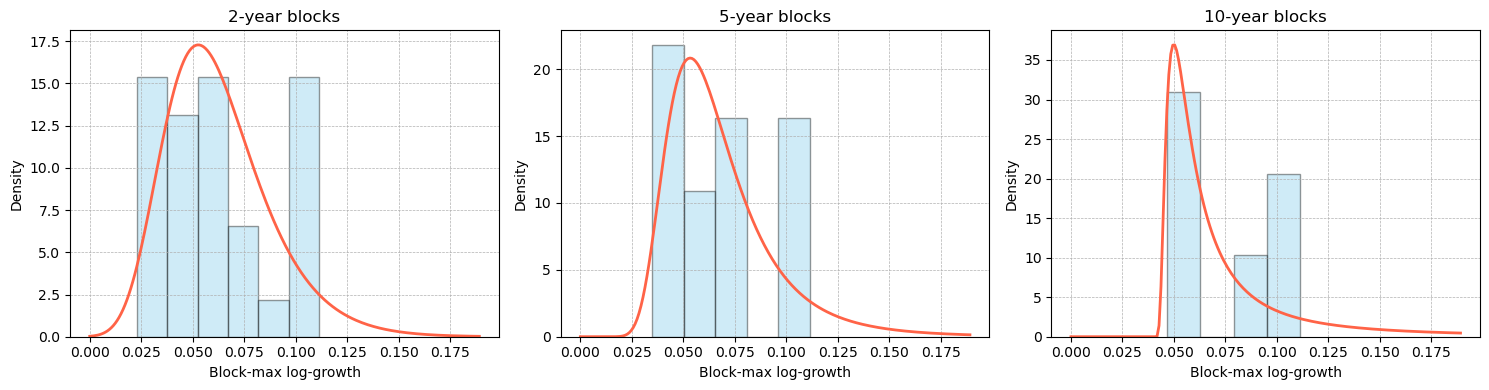

In [492]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
plot_hist_fit(max2 , c2 ,  mi2 ,  sigma2 , "2-year blocks",  axs[0])
plot_hist_fit(max5 , c5 ,  mi5 ,  sigma5 , "5-year blocks",  axs[1])
plot_hist_fit(max10, c10,  mi10, sigma10, "10-year blocks", axs[2])
plt.tight_layout()
plt.show()

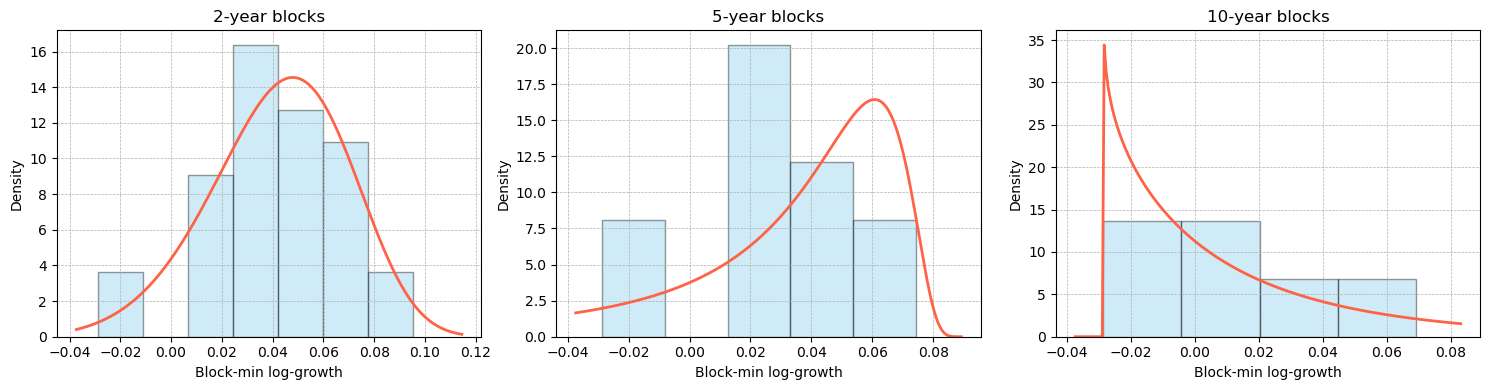

In [494]:
def plot_hist_fit_minima(minima_neg, c, loc, scale, title, ax):
    minima = -minima_neg 
    
    ax.hist(minima, bins='auto', density=True, alpha=0.4, color='skyblue', edgecolor='k')
    
    x = np.linspace(min(minima)*1.3, max(minima)*1.2, 200)  
    x_neg = -x 
    pdf = genextreme.pdf(x_neg, c, loc=loc, scale=scale)
    
    ax.plot(x, pdf, lw=2, color='tomato')
    ax.set_xlabel("Block-min log-growth")
    ax.set_ylabel("Density")
    ax.set_title(title)
    ax.grid(ls='--', lw=.5)

fig, axs = plt.subplots(1, 3, figsize=(15,4))
plot_hist_fit_minima(min2 , cm2 ,  mim2 ,  sigmam2 , "2-year blocks",  axs[0])
plot_hist_fit_minima(min5 , cm5 ,  mim5 ,  sigmam5 , "5-year blocks",  axs[1])
plot_hist_fit_minima(min10, cm10,  mim10, sigmam10, "10-year blocks", axs[2])
plt.tight_layout()
plt.show()

# Nekoi prasanja sto mozeme da gi odgovorime otkoga sme ja fituvale distribucijata

1. Koja e verojatnosta deka maksimumot na 2-godisen interval ke nadmine odredena vrednost?
3. Koja e verojatnosta deka minimumot na 2-godisen interval ke bide pomal od odredena vrednost?


#### 1. Koja e verojatnosta deka maksimumot na 2-godisen interval ke ja nadmine odredena vrednost?

In [505]:
xi      = -c2          
c       = c2           
mi      = mi2          
sigma   = sigma2       

# vrednosti za koi ke kalkuliram verojatnost
percentages_for_which_to_calculate_prob = np.array([4, 6, 8, 10, 12, 14, 16, 18])        
r          = percentages_for_which_to_calculate_prob / 100.0                 

# konvertiranje na obicen growth rate vo continuous growth rate
continuout_growth_rates = np.log(1 + r)         


prob = 1 - genextreme.cdf(continuout_growth_rates, c, loc=mi, scale=sigma)

results = pd.DataFrame({
    "Procent na rast": percentages_for_which_to_calculate_prob,
    "Verojatnost deka procentot na rast ke ja nadmine taa vrednost vo 2-godisen blok": np.round(prob, 4)
})
results 

Procent na rast  \
0                4   
1                6   
2                8   
3               10   
4               12   
5               14   
6               16   
7               18   

   Verojatnost deka procentot na rast ke ja nadmine taa vrednost vo 2-godisen blok  
0                                             0.8275                                
1                                             0.5150                                
2                                             0.2513                                
3                                             0.1061                                
4                                             0.0411                                
5                                             0.0150                                
6                                             0.0052                                
7                                             0.0017

#### 2. Koja e verojatnosta deka minimumot na 2-godisen interval ke bide pomal od odredena vrednost?

In [508]:
xi      = -cm2
c       = cm2
mi      = mim2
sigma   = sigmam2

percentages = np.array([-1,0,4, 6, 8, 10, 12])
r = percentages / 100.0                 

continuous_growth_rates = np.log(1 + r)         

prob_below = 1 - genextreme.cdf(-continuous_growth_rates, c, loc=mi, scale=sigma)

results_minima_below = pd.DataFrame({
    "Procent na rast": percentages,
    "Verojatnost deka procentot na rast ke bide pomal od taa vrednost vo 2-godisen blok": np.round(prob_below, 4)
})

results_minima_below


Procent na rast  \
0               -1   
1                0   
2                4   
3                6   
4                8   
5               10   
6               12   

   Verojatnost deka procentot na rast ke bide pomal od taa vrednost vo 2-godisen blok  
0                                             0.0386                                   
1                                             0.0733                                   
2                                             0.4348                                   
3                                             0.7062                                   
4                                             0.9063                                   
5                                             0.9853                                   
6                                             0.9991